# A project on house price prediction

**The dataset used here can be obtained easily from Kaggle**

I have analysed and made The MLR using purely pipelines.

## Importing some of the nessesary libraries 

In [137]:
#core libraries
import pandas as pd
import numpy as np
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#We might add more libraries on machine learning section

## Reading our data into the dataFrame

In [138]:
#load data into a pandas data frame
housing = pd.read_csv('train.csv')

## Exploratory data analysis(EDA)

### (1).Understanding data structure

#### (a).general data structure

In [4]:
#get to see the column names of our data
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#let us see the number of rows and columns our data contains #shape,
housing.shape
#from my results there are only 1460(rows) training examples
# this data is small by machine learning standards,we have 81(columns) attributes;of the attributes 
#that we have,id is not important
# and the attribute sales price is what we are predicting so the remaining 79 is what we are going to use

(1460, 81)

In [9]:
#now let us take a look at the first 5 rows of our data,
housing.head()
#we can see that we have many missing data(NaN) and that both numerical
#(eg,LotFrontage) and categorical(eg,LotShape) data types(attributess) are present

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
#we can drop the id column since its just indexing our data and we dont need indexes of houses for our case
housing=housing.drop('Id',axis=1)

In [48]:
#Lets get the general information about our data
housing.info()
#We have seen that we have 37(3flts,34ints) numerical variables,43 categorical attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### (b).numerical attributes

In [6]:
#Isolate them from the categorical ones
numerals = housing.select_dtypes(exclude = ['object'])

In [9]:
#get statistical summary of numerical attributes only and present in a simple way(transposition,no of decimal points)
numerals.describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


#### (c).categorical attributes

In [7]:
#Isolate them from the numerical ones
categoricals = housing.select_dtypes(include = ['object'])

In [7]:
#get 'statistical summary' of categorical attributes 
#NB for categorical attribute it is not statistical summary,the describe() 
#method gives other important information like unique values,top,frequency etc.
categoricals.describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### (2).Data exploration

#### (a).numerical attributes

##### (i).target variable

In [23]:
#select the target variable
target = housing['SalePrice']

In [9]:
#get its statistical surmary
target.describe().transpose()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'distribution of target variable')

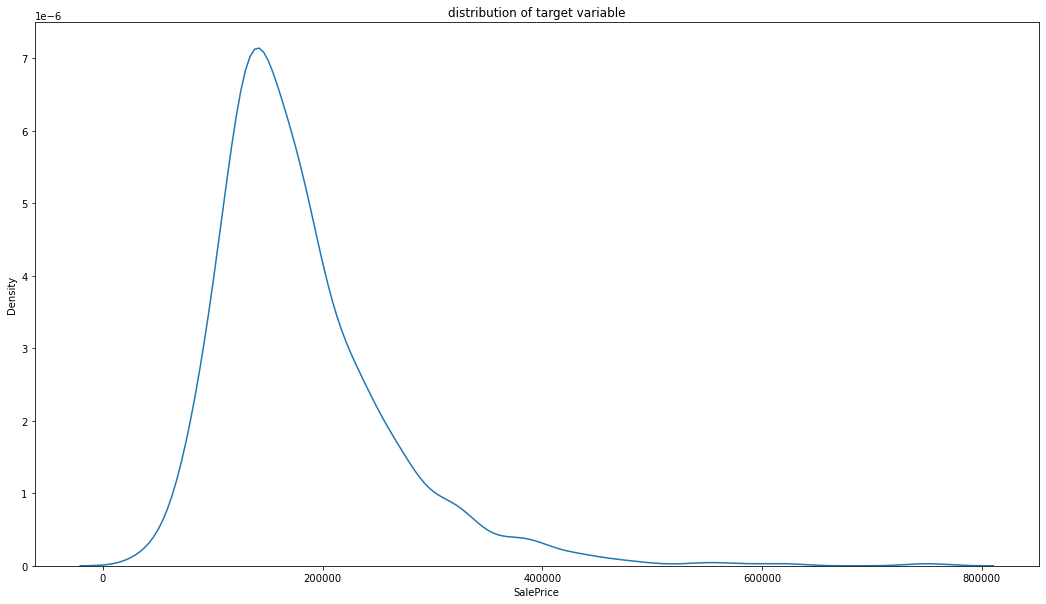

In [10]:
#plot the distribution of the target variable
fig = plt.figure(figsize = (18,10))
sns.distplot(target,hist = False)
plt.title('distribution of target variable')
#from observation the target variable is skewed towards right

Text(0.5, 1.0, 'distribution of skew-free target variable')

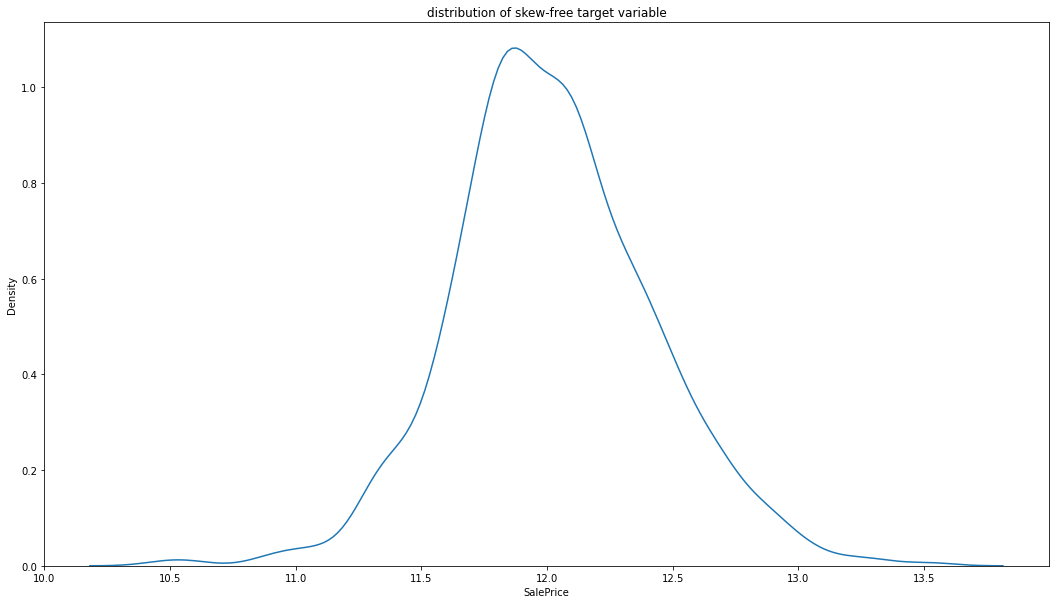

In [17]:
# Plot a skew-free distribution of target variable
fig = plt.figure(figsize = (18,10))
sns.distplot(np.log(target),hist = False)
plt.title('distribution of skew-free target variable')
#To visualize a more normally distributed target variable we used its log to plot


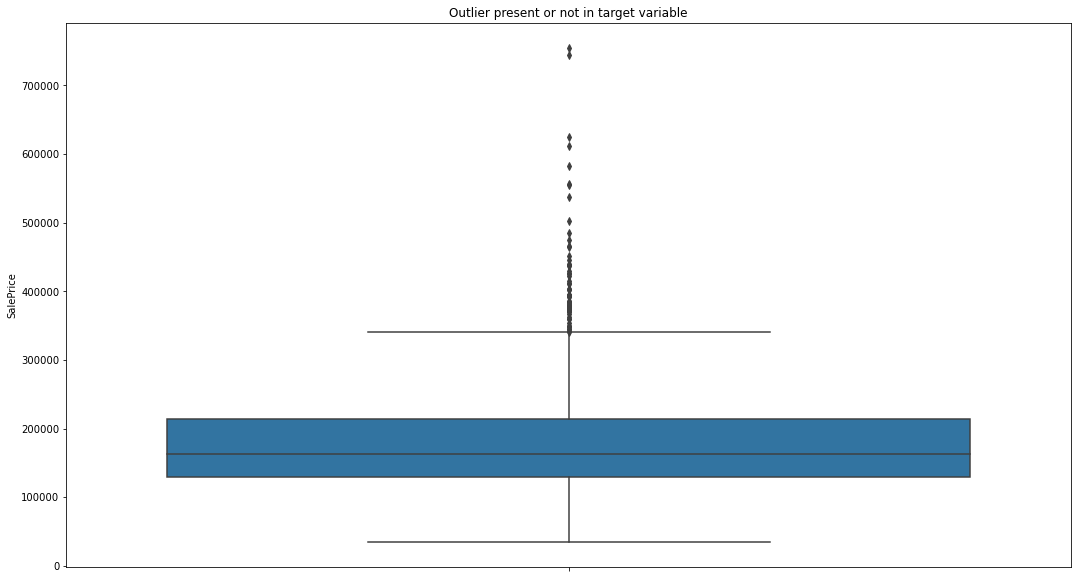

In [18]:
#lets see if our target variable has outliers
fig = plt.figure(figsize = (18,10))
sns.boxplot(y=target)
plt.title('Outlier present or not in target variable')
plt.show()

#we have some outliers prices above 700000 are outliers

**NB:** its good to know that outliers and skeweness in target variable is not going to affect the model's performance,therefore we will not solve this in the data cleaning phase

##### (ii).predictor variables(numerical)

In [9]:
#select the numerical predictors
predictor_nm = housing.select_dtypes(exclude = ['object']).drop(['SalePrice'],axis = 1).copy()


There is no need of reviewing the statistical summary for the numerical predictor variables since we had already done that.

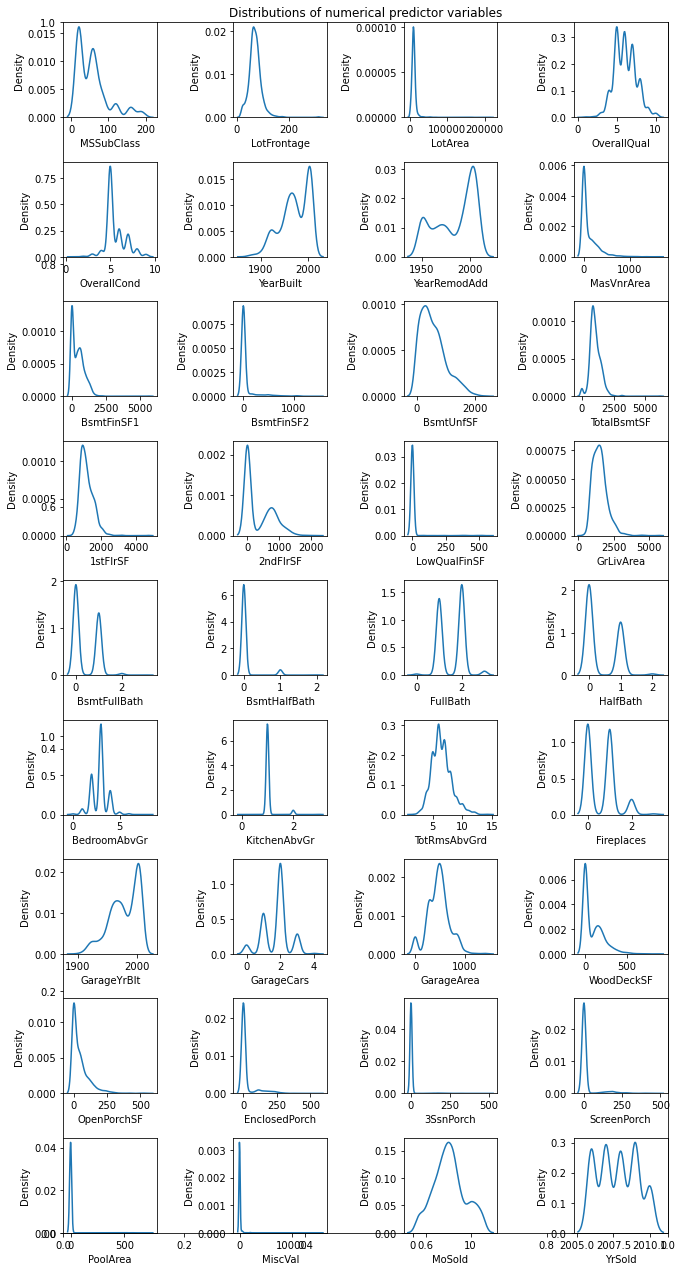

In [20]:
#Lets look at the distribution of the numerical predictor variables,they are 36 in total
fig = plt.figure(figsize = (10,18))
plt.title('Distributions of numerical predictor variables')
for predictor in range(len(predictor_nm.columns)):
    fig.add_subplot(9,4,predictor+1)
    sns.distplot(predictor_nm.iloc[:,predictor].dropna(),hist = False)
#tight layout creates a meaningful spacing between the plots
plt.tight_layout()
plt.show()
#To plot distributions of all the numerical predictor variables,we called the dist function in a for loop
#from the plots you can see that we have some predictor distributions that show skeweness eg LotFrontage
#For predictors,skeweness must be solved since it can affect the model performance

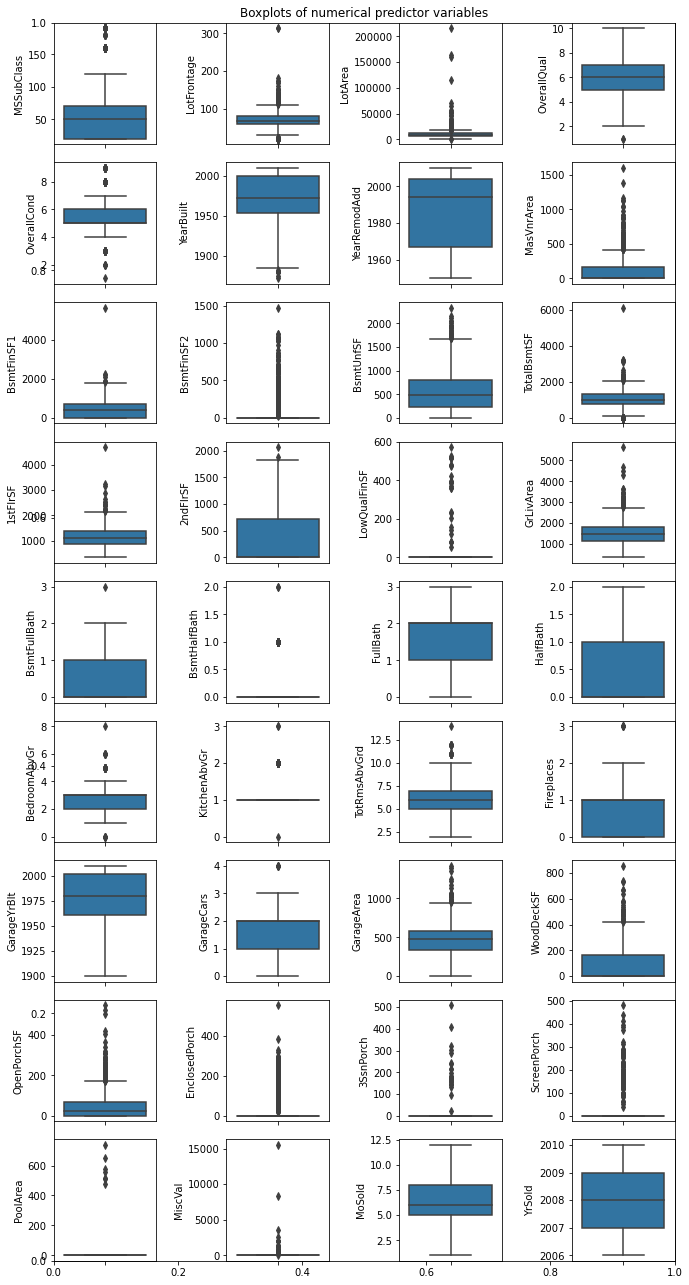

In [21]:
#Lets spot outliers in our predictors,remember for predictors,it is important to handle outliers
fig = plt.figure(figsize = (10,18))
plt.title('Boxplots of numerical predictor variables')
for predictor in range(len(predictor_nm.columns)):
    fig.add_subplot(9,4,predictor+1)
    sns.boxplot(y=predictor_nm.iloc[:,predictor].dropna())
    plt.ylabel(predictor_nm.columns[predictor])
plt.tight_layout()
plt.show()
#We have outliers in various predictor variables,we will have to handle 
#outliers in some of the numerical variables that we shall use as predictors

*Lets play with individual numerical predictor variables to see how they affect price*

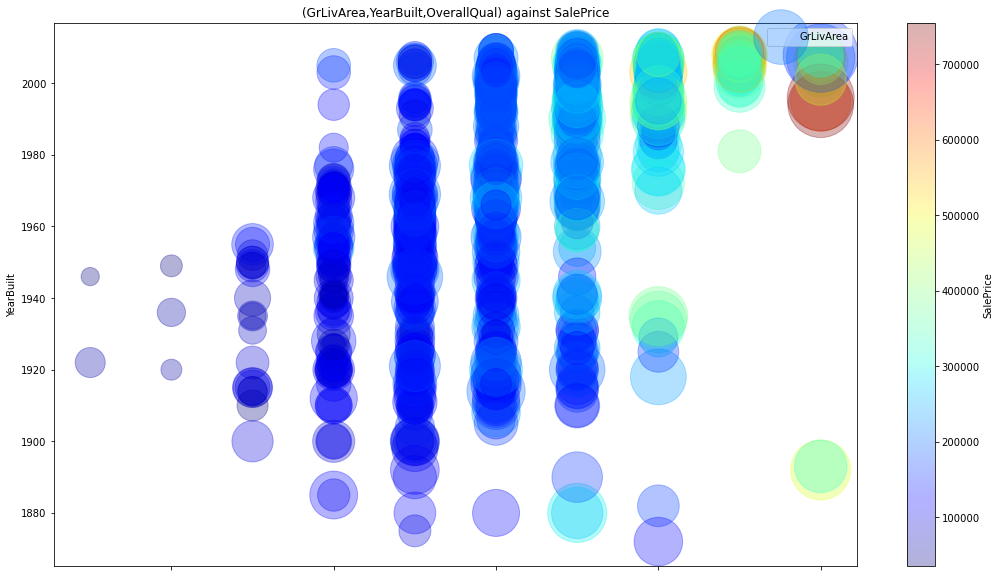

In [43]:
#How does the combination of YearBuilt,OverallQual,GrLivArea affect the price of a house
#Have used the pandas plot() method and matplotlib's scripting interface (pyplot)
housing.plot(kind = 'scatter',y = 'YearBuilt',x = 'OverallQual',s = housing['GrLivArea'],c = 'SalePrice',alpha = 0.3,cmap = plt.get_cmap
            ('jet'),colorbar = 'True',label = 'GrLivArea',figsize = (18,10))
plt.title('(GrLivArea,YearBuilt,OverallQual) against SalePrice')
plt.legend()
plt.show()

#from the scatter plot we can see houses with bigger GrLivArea,better OverallQual and newer are more expensive

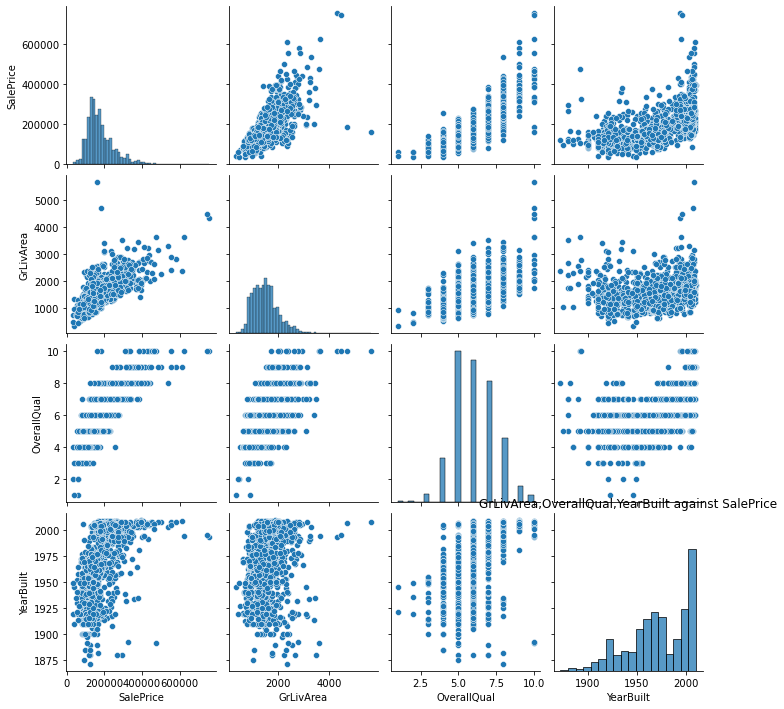

<Figure size 1296x720 with 0 Axes>

In [31]:
#how does each of the mentioned above as an individual atrribute now relate with price
#let's draw a pair-wise scatter matrix
pairs = housing[['SalePrice','GrLivArea','OverallQual','YearBuilt']]
sns.pairplot(pairs)
plt.title('GrLivArea,OverallQual,YearBuilt against SalePrice')
fig = plt.figure(figsize = (18,10))
#from the plot GrLivArea and OverallQual has an almost perfect linear relationship with price

**NB:** You can play with as many predictor variables as you want to obtain the relevant insights

In [10]:
#getting the correlation among numerical predictors(target variable is also included in the result here)
cr = housing.corr().select_dtypes(exclude = ['object'])
cr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


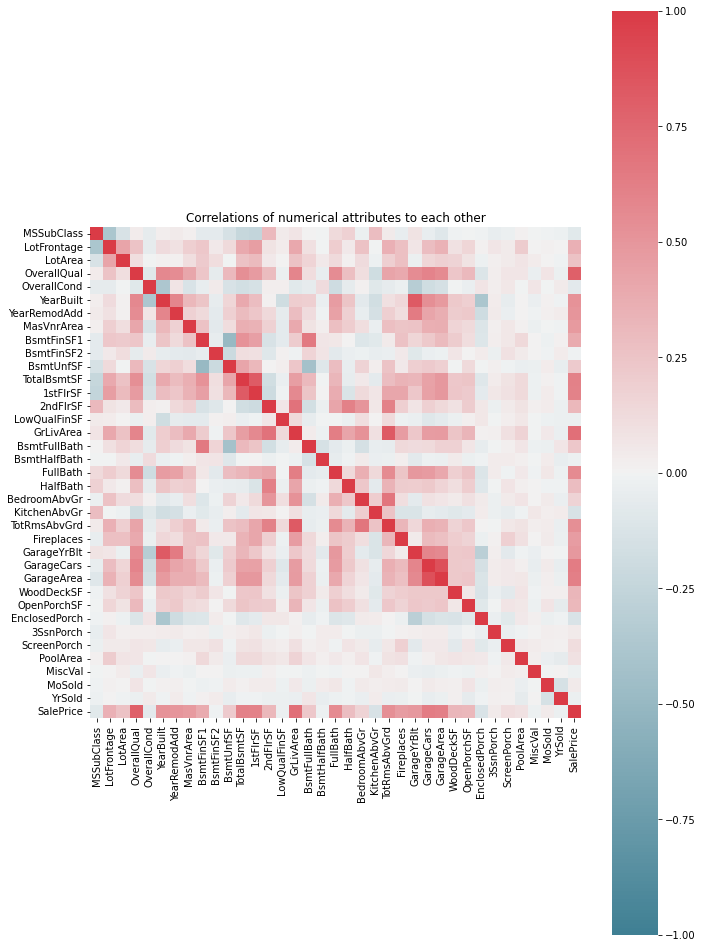

In [27]:
#lets plot a heatmap to visualize correlations with ease

#... here we have used matplotlib's artistic layer
f,ax = plt.subplots(figsize = (11,17))
mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = 0
sns.heatmap(cr,mask = mask,ax=ax,vmin = -1,vmax = 1,cmap = sns.diverging_palette(220, 10, as_cmap=True),square = True)
plt.title('Correlations of numerical attributes to each other')
plt.show()
#From the results,some attributes are highly correlated with price eg overallQual,some are highly correlated with other 
#predictor variables,for this reason we shall drop some which are correlated with one another.

In [28]:
#get the correlation of attributes with the target variable,sort results from highly corr
#elated
cr['SalePrice'].sort_values(ascending=False)
#from the plot OverallQual and GrLivArea seems to be highly positively correlated 
#with price with OverallQual being the most correlated
#On the other side KitchenAbvGr is the most negatively correlated with weak negative 
#correlations with price

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Lets continue being curious and investigate further on our two most correlated attributes

Text(0.5, 1.0, 'OverallQual against SalePrice')

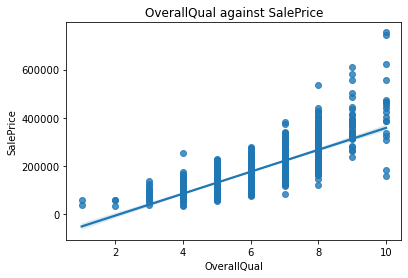

In [34]:
#We can plot a regression plot to visually show the strength of the correlation between
#OverallQual and SalePrice
sns.regplot(x=housing['OverallQual'],y=housing['SalePrice'])
plt.title('OverallQual against SalePrice')
#Perfect! from the plot the relationship is a strong positive correlation

Text(0.5, 1.0, 'OverallQual against SalePrice')

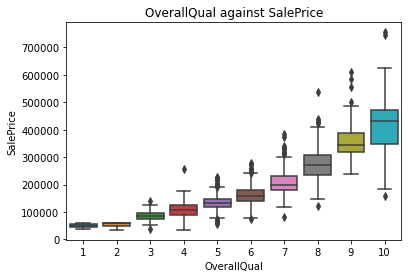

In [35]:
#Lets see further via boxplot
sns.boxplot(x=housing['OverallQual'],y=housing['SalePrice'])
plt.title('OverallQual against SalePrice')
#boxplots also show the same,price increases with OverallQual

**From the observation(heatmap visualization) and actual correlation values we have seen that GarageArea and GarageCars has a higher correlation to the target variable SalePrice
but they are highly correlated to each other,we will need to drop one during data cleaning**

#### (b).categorical attributes

In [11]:
#select categorical attributes
predictor_cate = housing.select_dtypes(include=['object'])
predictor_cate.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Text(0.5, 1.0, 'Kitchen Quality against SalePrice')

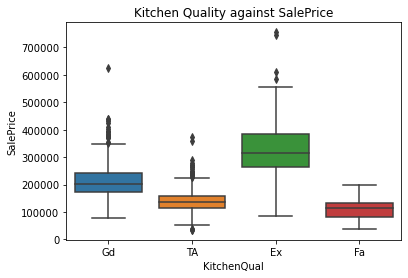

In [40]:
#we wanna see how KitchenQual and SalePrice relate
#we can use seaborn's boxplot 
sns.boxplot(x=housing['KitchenQual'],y=housing['SalePrice'])
plt.title('Kitchen Quality against SalePrice')

#kitchenQual is a categorical variable thus is grouped into various kitchen quality types
#houses with quality type 'EX' from the plot are the most expensive ones and with
#the highest variabilities,'Fa' are the cheapest and with no price variabilities.


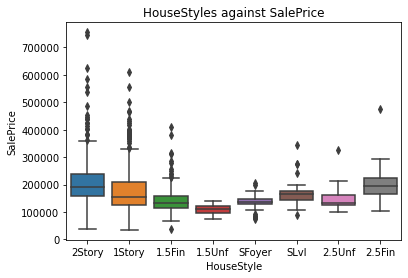

In [41]:
#what about house styles what impact do they have on price
#lets see via boxplot too
sns.boxplot(x=housing['HouseStyle'],y=housing['SalePrice'])
plt.title('HouseStyles against SalePrice')
plt.show()
#2Story houseStyle houses are the most expensive and with the highest price variabilities
#while 1.5Unf are the cheapest with no price variabilities

Text(0, 0.5, 'Frequency')

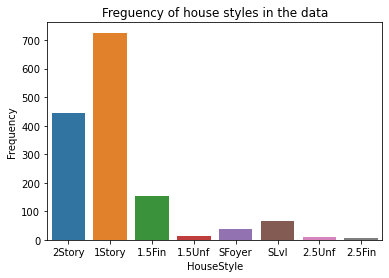

In [45]:
#And how are these house styles distributed in our data?
#lets get their frequency
sns.countplot(x=housing['HouseStyle'],data = housing)
plt.title('Freguency of house styles in the data')
plt.ylabel('Frequency')
#1Story are the most frequent with a frequency of over 700,2.5Fin are the least frequent

In [46]:
#Lets get the actual frequency count of the house styles
housing['HouseStyle'].value_counts()
#this has given us the actual count rather than the approximation that the graph gave us
#we have 726 1Story

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Text(0.5, 1.0, 'HouseStyles against Period')

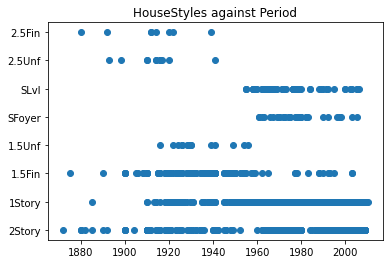

In [49]:
#Lets be a little bit more curious and see if the styles of the houses have changed over
#the years
#Here I will use the matplotlib's scripting interface to plot a graph of kind scatter plot
plt.scatter(x=housing['YearBuilt'],y=housing['HouseStyle'])
plt.title('HouseStyles against Period')
#from the plot we can see that 2Story have been there over the Years,SFoyer and SLvl are
#newer styles,2.5Fin,2.5Unf have become extinct.

### (3).Data Preprocessing

Now its time to act on what we took note on.Well based on my understanding,we will handle this stage(data cleaning) by the use of pipelines.I will work on yet another project later considering other ways of data cleaning but for this lets just use pipelines.Pipelines simplifies the steps of data preprocessing.In the numerical pipeline we will include sklearn's **StandardScaler()** for feature scaling,sklearn's **SimpleImputer()** for dealing with missing values.For the categorical pipeline we will use sklearn's **OneHotEncoder()** for encoding categorical data and **SimpleImputer()** for handling missing values.Let's go! 

In [77]:
#lets import some core preprocessing libraries from module scikitlearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

#### (a).numerical attributes

In [14]:
#lets check how many predictor variables contain null values in our data
predictor_nm.isnull().sum()
#LotFrontage has very many missing values,we should not worry our numerical pipeline that we are creating will
#definitely handle this,will also handle feature scaling


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [82]:
#Lets create a pipeline to handle numerical predictors
Input = [('scaler',StandardScaler()),('imputer',SimpleImputer(strategy = 'median'))]
num_pipe = Pipeline(Input)
num_pipe                                                                                     

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median'))])

#### (b).categorical attributes

In [83]:
#Lets create a pipeline to handle categorical predictors
Input = [('imputer',SimpleImputer(strategy = 'constant',fill_value = 'missing')),
         ('encoder',OneHotEncoder(handle_unknown = 'ignore'))]
cate_pipe = Pipeline(Input)
cate_pipe

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

#### (c).all predictor attributes

In [84]:
#Lets put numerical and categorical predictor attributes of our data in separate containers in form of lists
na = list(predictor_nm)
ca = list(predictor_cate)

In [105]:
#Lets now create a general preprocessor Pipeline for handling both attributes
Input = [('num',num_pipe,na),('cat',cate_pipe,ca)]
preprocessor = ColumnTransformer(Input)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', '

In [86]:
#First of all apply log transform to the target variable to normalize it remember we saw from the distribution
#that it is skewed?
target = np.log(housing['SalePrice'])

In [89]:
#This is just to remind you what our predictors were
predictors = housing.drop('SalePrice',axis = 1).copy()
len(predictors.columns)
#There were 79 predictors (43 cat attributes and 36 num attributes)

79

### (4).Creating The Model

In [101]:
#Importing core machine learning libraries from sklearn for predicting and 
#for splitting data into train and test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### (a).Full Prediction Pipeline

In [100]:
#We will create a full prediction pipeline using our preprcessor and the LinearRegression model
Input = [('preprocessor',preprocessor),('model',LinearRegression())]
full_pipe = Pipeline(Input)
full_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
               

#### (b).Fit the Prediction Pipeline(model) to your training data

In [106]:
#First split the data,for conviniency we will assign X to be our independent variables,y to be our depedent
#variable
X = predictors
y = target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [107]:
#Now fit the full pipeline to your training data
full_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
               

#### (c).Perform the prediction using test data

In [123]:
#Now we are done,lets see how it is predicting using our test data
y_predicted = full_pipe.predict(X_test)
y_predicted

array([12.50992226, 11.85856817, 11.74245107, 12.33506307, 11.48586433,
       11.2034618 , 12.43797267, 11.77188556, 13.30729331, 11.97190084,
       12.22549876, 11.56713418, 12.33481116, 11.70961748, 11.64200658,
       11.86774413, 12.32604727, 11.72266538, 11.83224321, 12.06721111,
       11.69020074, 12.09507038, 11.55632606, 11.95318027, 12.15475813,
       11.93373278, 12.02232391, 11.20380377, 12.61515593, 11.6728851 ,
       11.96706554, 12.21252188, 11.95388485, 12.56548354, 12.74787097,
       12.19316121, 12.51856494, 11.72838267, 12.33883762, 12.70905846,
       12.18068926, 11.71174419, 12.14350873, 12.64639123, 12.89762087,
       11.89927894, 11.26705905, 11.81476149, 12.04144347, 11.4670583 ,
       12.96045471, 11.93437178, 12.01306428, 11.32047399, 12.3835171 ,
       11.59669864, 11.46976301, 12.30493976, 11.78019466, 11.26030031,
       11.86742742, 11.78407791, 11.77704192, 11.96205943, 12.24805914,
       12.03533342, 11.74777627, 12.25370717, 11.89785819, 12.21

### (5).Model Evaluation

I will evaluate the model using just two ways(R-Squared,Mean-Squared-Error).R2 measures how close the data is
to the fitted regression line.Mean Squared Error measures the difference between actual value and predicted value

In [120]:
#Import the necessary in sample evaluation libraries
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [129]:
#Get the model Accuracy using R-Squared
score = full_pipe.score(X_test,y_test)
print('R2 Accuracy score using test data is',score*100,'%')

R2 Accuracy score using test data is 62.06931123587985 %


In [128]:
#Get the model Accuracy using Mean-Squared-Error(we get the error between the predicted and the actual)
score = mean_squared_error(y_test,y_predicted)
print('mean_squared_error Accuracy score using test data is',score)
#NB for a good performing model mean_squared_error should be as small as possible
#the smaller it is the more accurate the model is

mean_squared_error Accuracy score using test data is 0.05742700281509883


### (6).From there you can feed the model  with the new house features data(new_input) and expect it to give you a price prediction of each house.

In [136]:
#You can fill your own features of houses which you you want the model to predict the prices
#Do not expect this cell to run since there is no input,it will throw an error untill you provide an input
# while feeding your data reshape it using reshape(1,-1).You can uncomment and try your own data

#new_input=''
#full_pipe.predict(new_input)

# Well I think from here our model is ready and working,Thanks everyone and please comment on the areas I forgot or need to improve!.Success on your data science journey